<a href="https://colab.research.google.com/github/william-screen/data-visualization-590/blob/master/labs/Logscale_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 10: Logscale

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [125]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

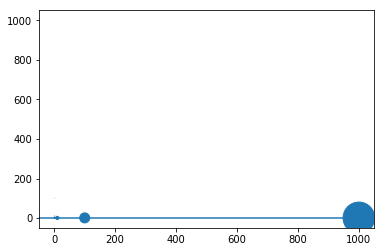

In [126]:
# Implement

# Scatter plot
plt.scatter(x, y, s=ratio)

# Draw a horizontal line at ratio=1 for a reference
plt.axhline(y=1)

# Show plot
plt.show()

**Q: Explain what's bad about this plot.**

In [0]:
# The linear scale does not accurately depict the data range over several orders of magnitude

**Q: Can you fix it? **

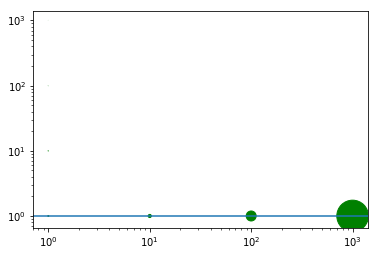

In [128]:
# Implement

# Scatter plot
plt.scatter(x, y, s=ratio, color='green')

# Draw a horizontal line at ratio=1 for a reference
plt.axhline(y=1)

# Adjust x and y axis scales
plt.xscale('log')
plt.yscale('log')

# Show plot
plt.show()

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [129]:
# Implement

# Load the movie dataset from vega_datasets
import vega_datasets
movies = vega_datasets.data.movies()
movies.head()

# Remove the NaN rows based on the following three columns: 
# IMDB_Rating, IMDB_Votes, Rotten_Tomatoes_Rating.

# Before drop
print('Before dropping rows')
print('Number of IMDB_Rating NaN rows BEFORE: {0} '.format(sum(movies.IMDB_Rating.isna())))
print('Number of IMDB_Votes NaN rows BEFORE: {0} '.format(sum(movies.IMDB_Votes.isna())))
print('Number of Rotten_Tomatoes_Rating NaN rows BEFORE: {0} '.format(sum(movies.Rotten_Tomatoes_Rating.isna())))

# Drop rows in-place
movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes', 'Rotten_Tomatoes_Rating'], inplace = True)

# After drop
print('After dropping rows')
print('Number of IMDB_Rating NaN rows AFTER: {0} '.format(sum(movies.IMDB_Rating.isna())))
print('Number of IMDB_Votes NaN rows AFTER: {0} '.format(sum(movies.IMDB_Votes.isna())))
print('Number of Rotten_Tomatoes_Rating NaN rows AFTER: {0} '.format(sum(movies.Rotten_Tomatoes_Rating.isna())))

Before dropping rows
Number of IMDB_Rating NaN rows BEFORE: 213 
Number of IMDB_Votes NaN rows BEFORE: 213 
Number of Rotten_Tomatoes_Rating NaN rows BEFORE: 880 
After dropping rows
Number of IMDB_Rating NaN rows AFTER: 0 
Number of IMDB_Votes NaN rows AFTER: 0 
Number of Rotten_Tomatoes_Rating NaN rows AFTER: 0 


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

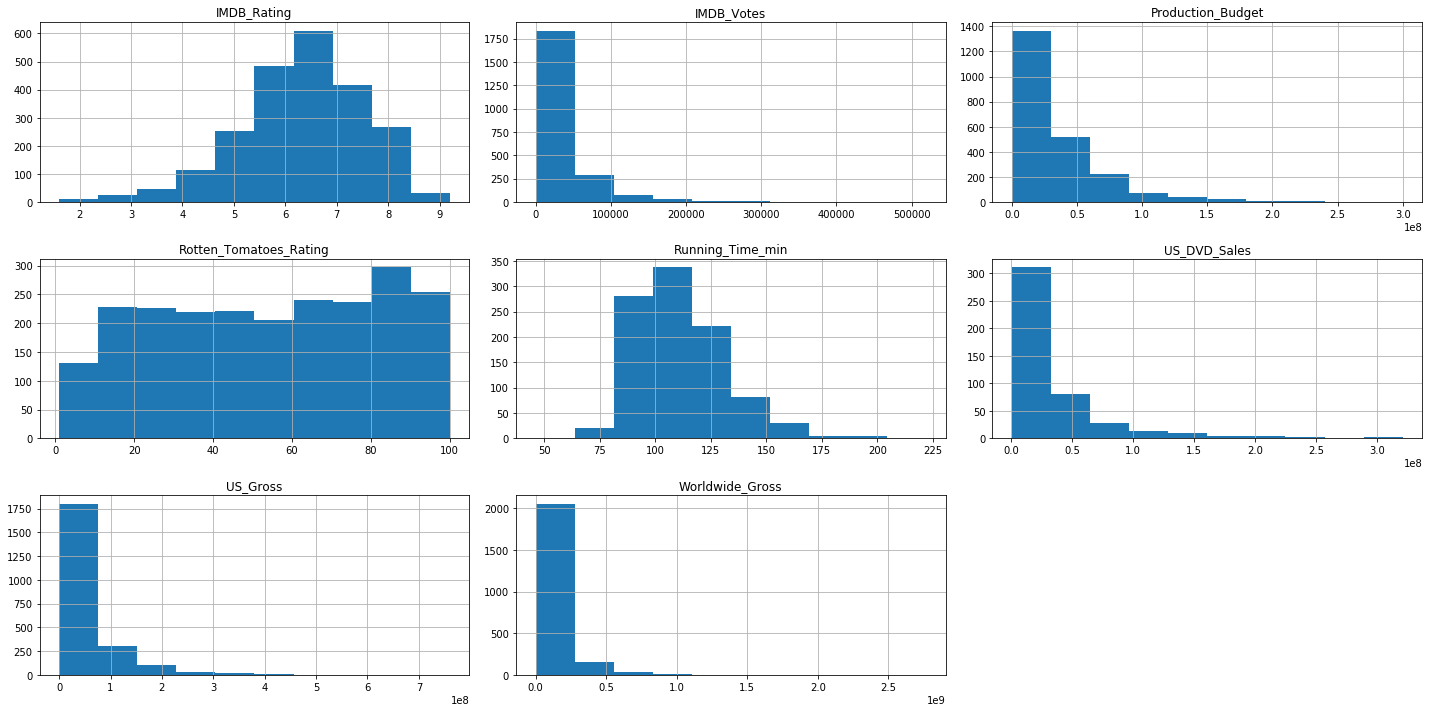

In [130]:
# Implement

# Draw all possible histograms of the movie dataframe. Adjust the size of the 
# plots if needed
ax = movies.hist(figsize=(20,10))
plt.tight_layout()

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

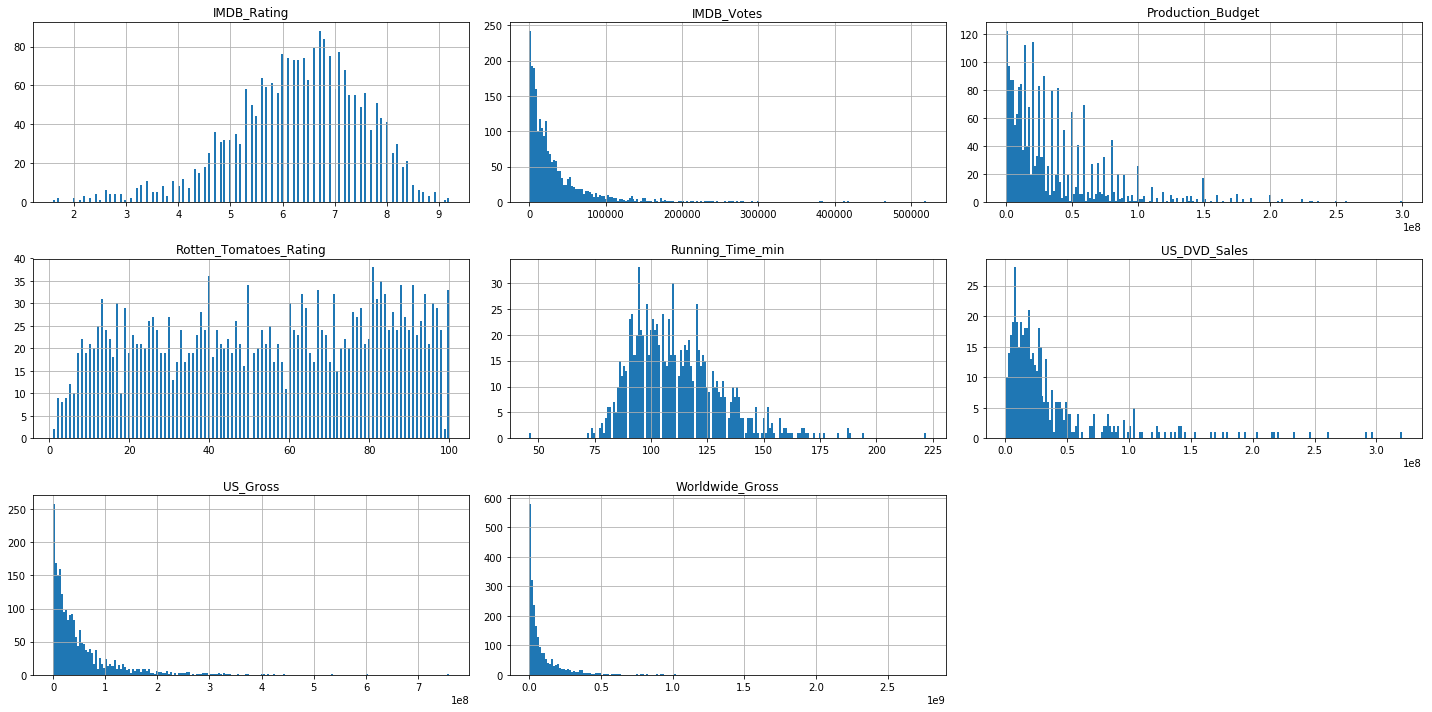

In [131]:
# Implement

# Draw all possible histograms of the movie dataframe. Adjust the size of the 
# plots if needed
movies.hist(figsize=(20,10), bins=200)

# Show plot
plt.tight_layout()
plt.show()

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

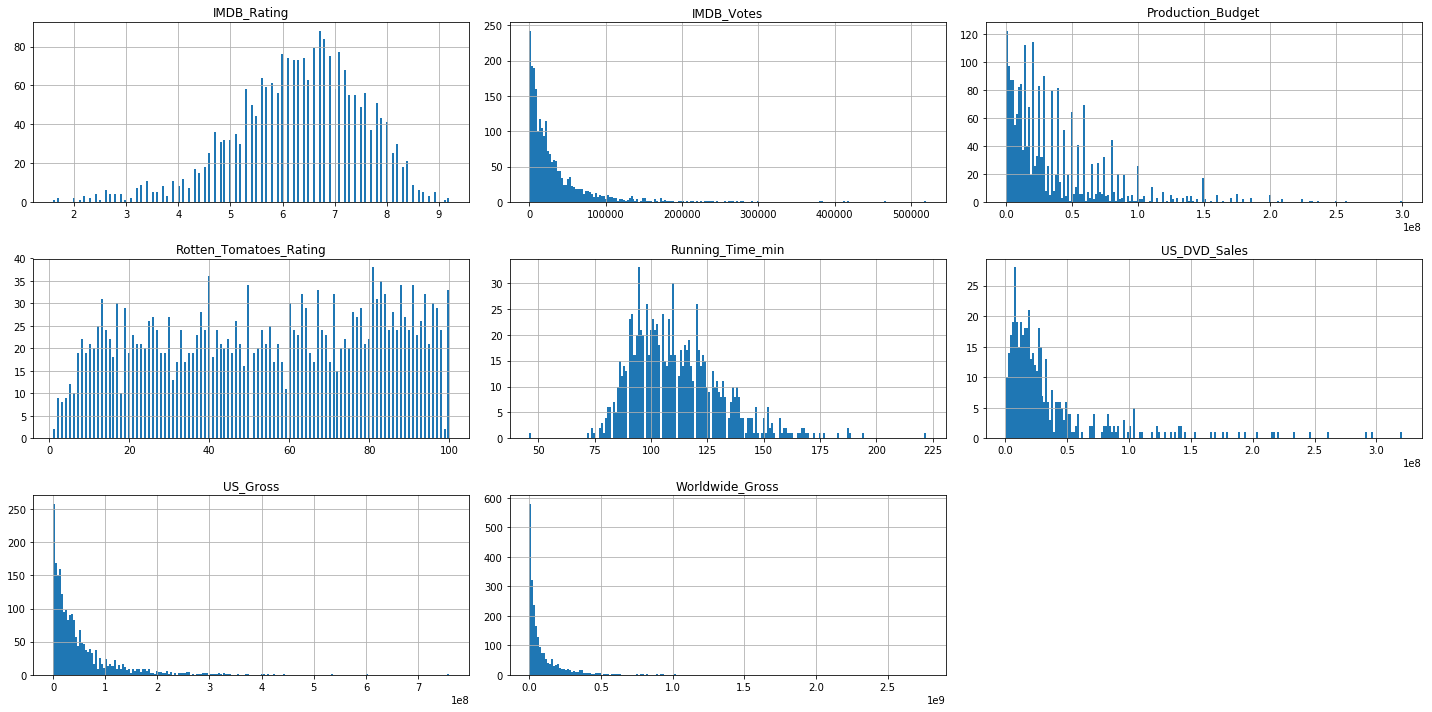

In [132]:
# Implement

# Draw all possible histograms of the movie dataframe. Adjust the size of the 
# plots if needed
movies.hist(figsize=(20,10), bins=200)

# Change the vertical scale to logarithmic scale
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


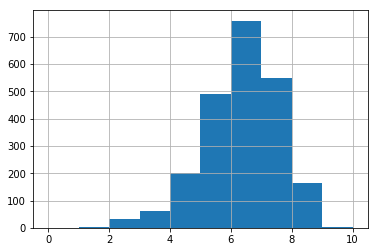

In [133]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [134]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [135]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0
min(movies.Worldwide_Gross)

1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [136]:
# Implement

# Set min and max bin ranges
min_bin = np.log10(min(movies.Worldwide_Gross))
max_bin = np.log10(max(movies.Worldwide_Gross))

# Create 20 bins from the minimum value to the maximum value.
bins=np.logspace(min_bin,max_bin, 20)
print(bins)

[1.00000000e+00 3.14018485e+00 9.86076088e+00 3.09646119e+01
 9.72346052e+01 3.05334634e+02 9.58807191e+02 3.01083182e+03
 9.45456845e+03 2.96890926e+04 9.32292387e+04 2.92757043e+05
 9.19311230e+05 2.88680720e+06 9.06510822e+06 2.84661155e+07
 8.93888645e+07 2.80697558e+08 8.81442219e+08 2.76789150e+09]


Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

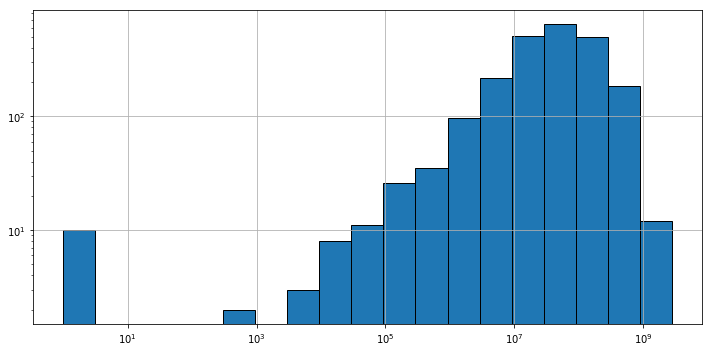

In [137]:
# Implement
movies.Worldwide_Gross.hist(figsize=(10,5), bins=bins, ec="k")

# Set both axis to be log-scale
plt.xscale('log')
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

What is going on? Is this the right plot?

**Q: explain and fix**

In [0]:
# Taking logs "pulls in" more extreme values on the right (high values) relative
# to the median, while values at the far left (low values) tend to get stretched
# back, further away from the median.

**Q: Can you explain the plot? Why are there gaps?**

In [0]:
# Taking logs "pulls in" more extreme values on the right (high values) relative
# to the median, while values at the far left (low values) tend to get stretched
# back, further away from the median.

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

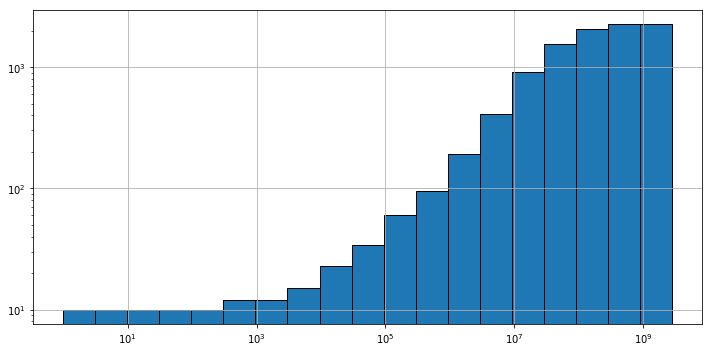

In [140]:
# Implement
movies.Worldwide_Gross.hist(figsize=(10,5), bins=bins, ec="k", cumulative=True)

# Set both axis to be log-scale
plt.xscale('log')
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

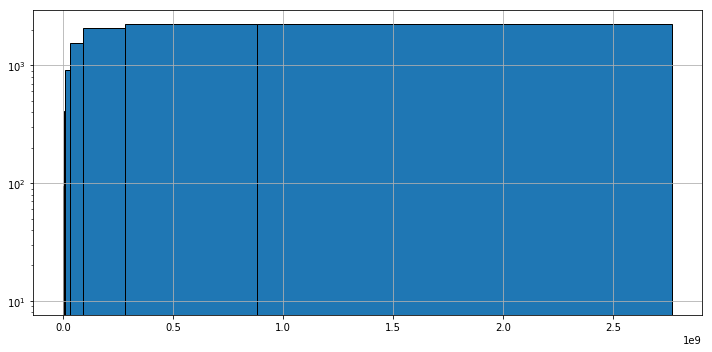

In [141]:
# Implement
movies.Worldwide_Gross.hist(figsize=(10,5), bins=bins, ec="k", cumulative=True)

# Set the horizontal axis to linear.
plt.xscale('linear')

# Set the vertical axis to log.
plt.yscale('log')

# Show plot
plt.tight_layout()
plt.show()

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [142]:
# Implement

# Which one should you use, loc or iloc? How are they different from each other?
# Use .loc for label based indexing
# Use .iloc for positional indexing

highest_gross_movie = movies.loc[movies['Worldwide_Gross'].idxmax()]['Title']
print('The most successful movie in our dataset is: {0}'.format(highest_gross_movie))

# Validate : Sort the values in descending order 
#movies.sort_values("Worldwide_Gross", axis = 0, ascending = False).head()

The most successful movie in our dataset is: Avatar
